In [140]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [160]:
# Loading the dataset
import os
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
path= '/content/drive/MyDrive/seeds.data'
features = ['Area',
            'Perimeter',
            'Compactness',
            'Length of kernel',
            'Width of kernel',
            'Asymmetry coefficient',
            ' groove.']
df= pd.read_csv(path,header=None,names=features + ['target'])
display(df)
#df['Area'] = df['Area'].astype(float)
print(df.dtypes)

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,groove.,target
0,Area,Perimeter,Compactness,Length,Width,Asymmetry,Groove,Class
1,15.26,14.84,0.871,5.763,3.312,2.221,5.22,1
2,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
3,14.29,14.09,0.905,5.291,3.337,2.699,4.825,1
4,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
...,...,...,...,...,...,...,...,...
206,12.19,13.2,0.8783,5.137,2.981,3.631,4.87,3
207,11.23,12.88,0.8511,5.14,2.795,4.325,5.003,3
208,13.2,13.66,0.8883,5.236,3.232,8.315,5.056,3
209,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


Area                     object
Perimeter                object
Compactness              object
Length of kernel         object
Width of kernel          object
Asymmetry coefficient    object
 groove.                 object
target                   object
dtype: object


In [161]:
# Converting the features from in X Array and class in Y array
X = df.iloc[1:,[0,1,2,3,4,5,6]].values
X=X.astype('float64')
print(X.shape)
y = df.loc[1:,'target']
y=y.astype('int64')
#print (y)
print('Class labels:', np.unique(y))

(210, 7)
Class labels: [1 2 3]


In [162]:
# Randomly choosing 5% indices from the dataset and replace with NaN
random_rows = [np.random.randint(0,210,74)] # 210*7*5% = 74
random_cols = [np.random.randint(0,7,74)]
random_rows,random_cols
X[random_rows, random_cols] = np.nan
display(X)

array([[15.26  , 14.84  ,  0.871 , ...,  3.312 ,  2.221 ,  5.22  ],
       [14.88  , 14.57  ,  0.8811, ...,     nan,  1.018 ,  4.956 ],
       [14.29  , 14.09  ,  0.905 , ...,  3.337 ,     nan,  4.825 ],
       ...,
       [13.2   , 13.66  ,  0.8883, ...,  3.232 ,  8.315 ,  5.056 ],
       [11.84  , 13.21  ,  0.8521, ...,  2.836 ,  3.598 ,  5.044 ],
       [12.3   , 13.34  ,  0.8684, ...,  2.974 ,  5.637 ,  5.063 ]])

In [163]:
#Counting the numbers of NaN value in Dataframe
np.count_nonzero(np.isnan(X))

71

In [164]:
#Creating concatenated array
import numpy as np

#Create NumPy arrays
arr = np.array(X)
arr1 = np.array(y)

# Use concatenate() to join two arrays
con = np.column_stack((arr, arr1))
print(con.shape)
display(con)

(210, 8)


array([[15.26  , 14.84  ,  0.871 , ...,  2.221 ,  5.22  ,  1.    ],
       [14.88  , 14.57  ,  0.8811, ...,  1.018 ,  4.956 ,  1.    ],
       [14.29  , 14.09  ,  0.905 , ...,     nan,  4.825 ,  1.    ],
       ...,
       [13.2   , 13.66  ,  0.8883, ...,  8.315 ,  5.056 ,  3.    ],
       [11.84  , 13.21  ,  0.8521, ...,  3.598 ,  5.044 ,  3.    ],
       [12.3   , 13.34  ,  0.8684, ...,  5.637 ,  5.063 ,  3.    ]])

In [165]:
#Rechecking number of data values in array
np.count_nonzero(np.isnan(X))

71

In [167]:
#Converting the concatenated array into df 
import numpy as np
import pandas as pd

df = pd.DataFrame(con)
display (df)


,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0
1,14.88,14.57,0.8811,5.554,NaN,1.018,4.956,1.0
2,14.29,14.09,0.9050,5.291,3.337,NaN,4.825,1.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3.0
206,11.23,12.88,NaN,5.140,2.795,4.325,5.003,3.0
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3.0
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3.0


In [168]:
#Checking number of Nan values in df
df.isnull().sum()

0     7
1     8
2    10
3    11
4     9
5    15
6    11
7     0
dtype: int64

In [169]:
#Replacing the Nan values with Mean
from sklearn.impute import SimpleImputer
import numpy as np
imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

array([[15.26      , 14.84      ,  0.871     , ...,  2.221     ,
         5.22      ,  1.        ],
       [14.88      , 14.57      ,  0.8811    , ...,  1.018     ,
         4.956     ,  1.        ],
       [14.29      , 14.09      ,  0.905     , ...,  3.68142154,
         4.825     ,  1.        ],
       ...,
       [13.2       , 13.66      ,  0.8883    , ...,  8.315     ,
         5.056     ,  3.        ],
       [11.84      , 13.21      ,  0.8521    , ...,  3.598     ,
         5.044     ,  3.        ],
       [12.3       , 13.34      ,  0.8684    , ...,  5.637     ,
         5.063     ,  3.        ]])

In [170]:
#Printing imputed df
df = pd.DataFrame(imputed_data)
display (df)

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.871000,5.763,3.312000,2.221000,5.220,1.0
1,14.88,14.57,0.881100,5.554,3.252557,1.018000,4.956,1.0
2,14.29,14.09,0.905000,5.291,3.337000,3.681422,4.825,1.0
3,13.84,13.94,0.895500,5.324,3.379000,2.259000,4.805,1.0
4,16.14,14.99,0.903400,5.658,3.562000,1.355000,5.175,1.0
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.878300,5.137,2.981000,3.631000,4.870,3.0
206,11.23,12.88,0.871418,5.140,2.795000,4.325000,5.003,3.0
207,13.20,13.66,0.888300,5.236,3.232000,8.315000,5.056,3.0
208,11.84,13.21,0.852100,5.175,2.836000,3.598000,5.044,3.0


In [171]:
#Checking number of Nan values in df
df.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

In [173]:
X = df.iloc[:, [2,4]].values
X=X.astype('float64')
#print(X)
y = df.loc[:, 7].values
y=y.astype('int64')
#print (y)
print('Class labels:', np.unique(y))

Class labels: [1 2 3]


In [175]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1,stratify=y)

In [176]:
print('Labels counts in y:', np.bincount(y)[1:])
>>> print('Labels counts in y_train:', np.bincount(y_train)[1:])
>>> print('Labels counts in y_test:', np.bincount(y_test)[1:])

Labels counts in y: [70 70 70]
Labels counts in y_train: [56 56 56]
Labels counts in y_test: [14 14 14]


In [177]:
from sklearn.preprocessing import StandardScaler
>>> sc = StandardScaler()
>>> sc.fit(X_train)
>>> X_train_std = sc.transform(X_train)
>>> X_test_std = sc.transform(X_test)

In [178]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
    # X = X.to_numpy()
    # y = y.to_numpy()
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')
    # highlight test examples
    if test_idx:
    # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='Test set')

predicted: [1 1 2 3 1 1 2 2 3 3 3 3 1 3 2 1 2 2 2 1 2 1 3 1 1 2 3 1 1 2 1 1 3 2 2 1 2
 2 3 3 1 3]
true class: [2 1 2 3 1 3 2 2 3 3 3 3 1 3 2 2 2 2 2 1 3 1 3 1 1 2 3 1 1 1 1 1 3 2 2 2 1
 2 3 3 1 3]


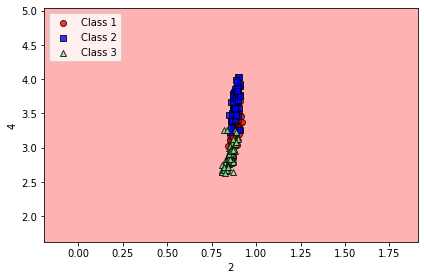

In [179]:
# Logistic Regression Classifier 
log_reg = LogisticRegression()
log_reg.fit(X_train_std,y_train)
y_pred= log_reg.predict(X_test_std)
print('predicted:',y_pred)
print('true class:', np.array(y_test))
plot_decision_regions(X, y, classifier=log_reg)
plt.xlabel(df.columns[2])
plt.ylabel(df.columns[4])
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [180]:
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 7


In [181]:
from sklearn.metrics import accuracy_score
>>> print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.833


In [ ]:
#Original dataset had an accuracy of 0.857, which is almost 2% more than the accuracy of the imputed data set. 